In [1]:
import numpy as np
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
import scipy.interpolate as interp
import scipy.stats as st
import scipy.signal as sig
from scipy.optimize import curve_fit
import pickle
import os


import astropy as ap
from astropy.io import fits
from astropy import table as t
from astropy.table import Table
from astropy import wcs
from astropy.cosmology import WMAP7


import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

In [3]:
os.chdir("/Users/Nitya/Work/Data/Project2")
drpall = t.Table.read('drpall-v2_5_3.fits')
drpall.add_index('plateifu')
index1 = np.where(drpall['srvymode']=='MaNGA dither')[0]
drpall1 = drpall[index1]
index2 = np.where(drpall1['z']>0)[0]
drpall = drpall1[index2]
index3 = np.where(drpall['nsa_z']>0)[0]
drpall = drpall[index3]

print(drpall.columns)
print(len(drpall))

<TableColumns names=('plate','ifudsgn','plateifu','mangaid','versdrp2','versdrp3','verscore','versutil','versprim','platetyp','srvymode','objra','objdec','ifuglon','ifuglat','ifura','ifudec','ebvgal','nexp','exptime','drp3qual','bluesn2','redsn2','harname','frlplug','cartid','designid','cenra','cendec','airmsmin','airmsmed','airmsmax','seemin','seemed','seemax','transmin','transmed','transmax','mjdmin','mjdmed','mjdmax','gfwhm','rfwhm','ifwhm','zfwhm','mngtarg1','mngtarg2','mngtarg3','catidnum','plttarg','manga_tileid','nsa_iauname','ifudesignsize','ifutargetsize','ifudesignwrongsize','z','zmin','zmax','szmin','szmax','ezmin','ezmax','probs','pweight','psweight','psrweight','sweight','srweight','eweight','esweight','esrweight','nsa_field','nsa_run','nsa_camcol','nsa_version','nsa_nsaid','nsa_nsaid_v1b','nsa_z','nsa_zdist','nsa_sersic_absmag','nsa_elpetro_absmag','nsa_elpetro_amivar','nsa_sersic_mass','nsa_elpetro_mass','nsa_elpetro_ba','nsa_elpetro_phi','nsa_extinction','nsa_elpetro_th

In [4]:
afile = open(r'manga_4000_hdelta_dn4000.pkl','rb')
a = pickle.load(afile, encoding = 'latin1')
afile.close()
a = a[index3]
print(a.dtype.names)
afile = open(r'shifted_z_0.02','rb')
d1 = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'shifted_z_0.04','rb')
d2 = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'shifted_z_0.06','rb')
d3 = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'shifted_z_0.08','rb')
d4a = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'shifted_z_0.1','rb')
d5 = pickle.load(afile, encoding = 'latin1')
afile.close()
afile = open(r'shifted_z_0.14','rb')
d6 = pickle.load(afile, encoding = 'latin1')
afile.close()

('plate_ifu', 'z', 'hdelta_all', 'hdelta_3', 'hdelta_5', 'hdelta_7', 'dn4000_all', 'dn4000_3', 'dn4000_5', 'dn4000_7')


561


/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/Users/nitya/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-

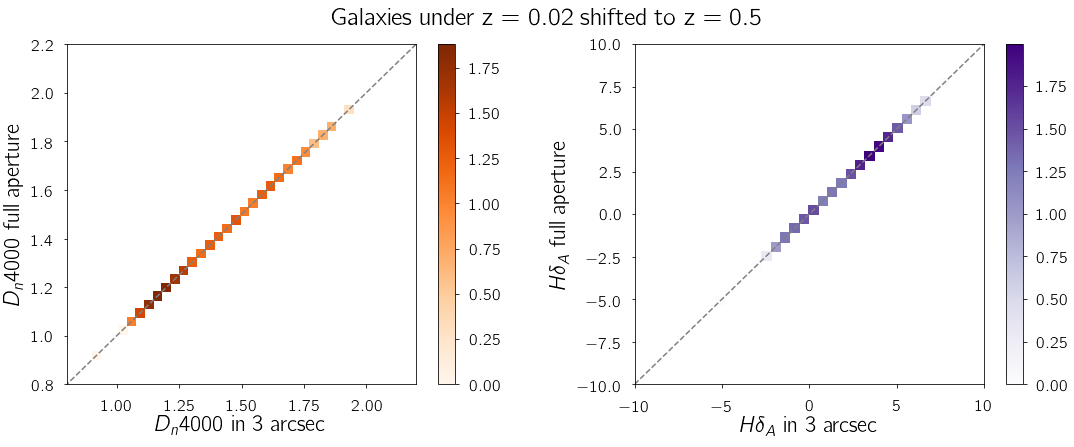

In [5]:
#os.chdir("/Users/nitya/Work/Paper2/data")
afile = open(r'codetesting0.5','rb')
test = pickle.load(afile, encoding = 'latin1')
afile.close()
hd = np.array([test[i][2][0] for i in range(len(test))])
d4 = np.array([test[i][2][1] for i in range(len(test))])
b = a[~np.isnan(hd)]
hd_all = b['hdelta_all']
d4_all = b['dn4000_all'][hd_all>-10]
hd_z1 = hd[~np.isnan(hd)][hd_all>-10]
d4_z1 = d4[~np.isnan(hd)][hd_all>-10]
hd_all = hd_all[hd_all>-10]
print(len(hd_all[hd_all>-10]))

offz_d4 = [d4_all[i]- d4_z1[i] for i in range(len(d4_z1))]
offz_hd = [hd_all[i]- hd_z1[i] for i in range(len(d4_z1))]
    
    
fig, ax = plt.subplots(1, 2, figsize = (18,7))
t1 = binned_statistic_2d(d4_z1,d4_all,d4_all,statistic = 'count',bins=(30,30))
yedges = t1[1]
xedges = t1[2]
number = np.ma.array(t1[0], mask = t1[0] == 0)
number = np.log10(number)
ax[0].plot([0.7,2.3],[0.7,2.3], color = 'grey', linestyle = '--')
cs1 = ax[0].pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.Oranges)
fig.colorbar(cs1, ax = ax[0])
ax[0].set_xlabel(r'$D_{n}4000$ in 3 arcsec')
ax[0].set_ylabel(r'$D_{n}4000$ full aperture')
ax[0].set_xlim(0.8,2.2)
ax[0].set_ylim(0.8,2.2)
t2 = binned_statistic_2d(hd_z1,hd_all,hd_all,statistic = 'count',bins=(30,30))
yedges = t2[1]
xedges = t2[2]
number = np.ma.array(t2[0], mask = t2[0] == 0)
number = np.log10(number)
ax[1].plot([-10,10],[-10,10], color = 'grey', linestyle = '--')
cs2 = ax[1].pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.Purples)
fig.colorbar(cs2, ax = ax[1])
ax[1].set_xlabel(r'$H\delta_{A}$ in 3 arcsec')
ax[1].set_ylabel(r'$H\delta_{A}$ full aperture')
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-10,10)
fig.text(0.495, 0.85, 'Galaxies under z = 0.02 shifted to z = 0.5', 
         ha='center', va='center', fontsize = 25)
fname = 'testing.pdf'
plt.subplots_adjust(wspace=0.3, top = 0.8)
# plt.savefig(fname, bottom = 1.0)
plt.show()

In [5]:

# def all_plots(array,z):
#     os.chdir("/Users/Nitya/Desktop")
#     hd = np.array([array[i][2][0] for i in range(len(array))])
#     d4 = np.array([array[i][2][1] for i in range(len(array))])
#     b = a[~np.isnan(hd)]
#     hd_all = b['hdelta_all']
#     d4_all = b['dn4000_all'][hd_all>-10]
#     hd_z1 = hd[~np.isnan(hd)][hd_all>-10]
#     d4_z1 = d4[~np.isnan(hd)][hd_all>-10]
#     hd_all = hd_all[hd_all>-10]
#     print(len(hd_all[hd_all>-10]))
    
#     #Offsets
#     offz_d4 = [d4_all[i]- d4_z1[i] for i in range(len(d4_z1))]
#     offz_hd = [hd_all[i]- hd_z1[i] for i in range(len(d4_z1))]
    
    
#     fig, ax = plt.subplots(1, 2, figsize = (12,6))
#     t1 = binned_statistic_2d(d4_z1,d4_all,d4_all,statistic = 'count',bins=(30,30))
#     yedges = t1[1]
#     xedges = t1[2]
#     number = np.ma.array(t1[0], mask = t1[0] == 0)
#     number = number
#     ax[0].plot([0.7,2.3],[0.7,2.3], color = 'grey', linestyle = '--')
#     cs1 = ax[0].pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.Purples)
#     #fig.colorbar(cs1, ax = ax[0])
#     ax[0].set_xlabel(r'$D_{n}4000$ (3 arcsec)', fontsize = 22)
#     ax[0].set_ylabel(r'$D_{n}4000$ (full aperture)', fontsize = 22)
#     ax[0].set_xlim(0.8,2.2)
#     ax[0].set_ylim(0.8,2.2)
#     t2 = binned_statistic_2d(hd_z1,hd_all,hd_all,statistic = 'count',bins=(30,30))
#     yedges = t2[1]
#     xedges = t2[2]
#     number = np.ma.array(t2[0], mask = t2[0] == 0)
#     number = number
#     ax[1].plot([-10,10],[-10,10], color = 'grey', linestyle = '--')
#     cs2 = ax[1].pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
#     #fig.colorbar(cs2, ax = ax[1])
#     cbar_ax = fig.add_axes([0.95, 0.10, 0.015, 0.8])
#     cbar = fig.colorbar(cs2,orientation = 'vertical', cax=cbar_ax)
#     ax[1].set_xlabel(r'$H\delta_{\rm A}$ (3 arcsec)', fontsize = 22)
#     ax[1].set_ylabel(r'$H\delta_{\rm A}$ (full aperture)')
#     ax[1].set_xlim(-10,10)
#     ax[1].set_ylim(-10,10)
#     fname = '3arcsec_vs_full_aperture_z'+str(z)+'.pdf'
#     plt.subplots_adjust(wspace=0.35, top = 0.83)
#     fig.text(0.525, 0.9, 'z = '+str(z), 
#          ha='center', va='center', fontsize = 25)
#     plt.savefig(fname, bottom = 1.0)
#     plt.show()
    
#     t = binned_statistic_2d(d4_z1,hd_z1,offz_d4,statistic = 'count', bins=(20,20))
#     t1 = binned_statistic_2d(d4_z1,hd_z1,offz_d4,statistic = 'mean', bins=(20,20))
#     td1 = binned_statistic_2d(d4_z1,hd_z1,offz_d4,statistic = np.std, bins=(20,20))
#     yedges = [(t1[1][i] + t1[1][i+1])*0.5 for i in range(len(t1[1][1:]))]
#     xedges = [(t1[2][i] + t1[2][i+1])*0.5 for i in range(len(t1[2][1:]))]
#     number1 = np.ma.array(t1[0], mask = t[0] <= 3)
#     numberd1 = np.ma.array(td1[0], mask = t[0] <= 3)
    
#     fig, ax = plt.subplots(1, 2, figsize = (12,6))
#     cs1 = ax[0].pcolormesh(yedges,xedges,(np.transpose(number1)),cmap = plt.cm.RdBu)
#     #fig.colorbar(cs1, ax = ax[0])
#     ax[0].set_xlabel(r'$D_{n}4000$')
#     ax[0].set_ylabel(r'$H_{\delta_{A}}$')
#     ax[0].set_ylim(-10,10)
#     ax[0].set_xlim(0.8,2.2)
#     ax[0].set_title(r'Mean offset in $D_{n}4000$', fontsize = 20)
#     cs2 = ax[1].pcolormesh(yedges,xedges,(np.transpose(numberd1)),cmap = plt.cm.binary)
#     #fig.colorbar(cs2, ax = ax[1])
#     ax[1].set_xlabel(r'$D_{n}4000$')
#     ax[1].set_ylim(-10,10)
#     ax[1].set_xlim(0.8,2.2)
#     ax[1].yaxis.set_ticklabels([])
#     ax[1].set_title(r'Dispersion in $D_{n}4000$', fontsize = 20)
#     filename2 = "z_"+str(z)+"_b.pdf"
#     plt.subplots_adjust(wspace=0, top = 0.83)
#     fig.text(0.495, 0.9, 'z = '+str(z), 
#              ha='center', va='center', fontsize = 25)
    
#     plt.savefig(filename2)
#     plt.show()

#     t2 = binned_statistic_2d(d4_z1,hd_z1,offz_hd,statistic = 'mean', bins=(20,20))
#     td2 = binned_statistic_2d(d4_z1,hd_z1,offz_hd,statistic = np.std, bins=(20,20))
#     yedges = [(t2[1][i] + t2[1][i+1])*0.5 for i in range(len(t2[1][1:]))]
#     xedges = [(t2[2][i] + t2[2][i+1])*0.5 for i in range(len(t2[2][1:]))]
#     number2 = np.ma.array(t2[0], mask = t[0] <= 3)
#     numberd2 = np.ma.array(td2[0], mask = t[0] <= 3)
    
#     fig, ax = plt.subplots(1, 2, figsize = (12,6))
#     cs1 = ax[0].pcolormesh(yedges,xedges,(np.transpose(number2)),cmap = plt.cm.coolwarm)
#     #fig.colorbar(cs1, ax = ax[0])
#     ax[0].set_xlabel(r'$D_{n}4000$')
#     ax[0].set_ylabel(r'$H_{\delta_{A}}$', labelpad = 1.2)
#     ax[0].set_ylim(-10,10)
#     ax[0].set_xlim(0.8,2.2)
#     ax[0].set_title(r'Mean offset in $H_{\delta_{A}}$')
#     cs2 = ax[1].pcolormesh(yedges,xedges,np.transpose(numberd2),cmap = plt.cm.binary)
#     #fig.colorbar(cs2, ax = ax[1])
#     ax[1].set_xlabel(r'$D_{n}4000$')
#     ax[1].set_ylim(-10,10)
#     ax[1].set_xlim(0.8,2.2)
#     ax[1].yaxis.set_ticklabels([])
#     ax[1].set_title(r'Dispersion in $H_{\delta_{A}}$')
#     filename3 = "z_"+str(z)+"_c.pdf"
#     plt.subplots_adjust(wspace=0, top = 0.83)
#     fig.text(0.495, 0.9, 'z = '+str(z), 
#              ha='center', va='center', fontsize = 25)
#     plt.savefig(filename3)
#     plt.show()
    
#     fig, ax = plt.subplots(figsize = (12,8))
#     q = ax.quiver(yedges, xedges, np.transpose(number1), 
#                   np.transpose(number2), headwidth=5)
#     plt.xlim(0.8,2.2)
#     plt.ylim(-10,10)
#     plt.xlabel(r'$D_{n}4000$')
#     plt.ylabel(r'$H_{\delta_{A}}$')
#     filename4 = "z_"+str(z)+"_d.pdf"
#     plt.savefig(filename4)
#     plt.show()

In [6]:
# all_plots(d1,0.02)
#all_plots(d2,0.04)
# all_plots(d3,0.06)
# # all_plots(d4a,0.08)
# # all_plots(d5,0.1)
# all_plots(d6,0.14)

In [7]:
# hd = np.array([d2[i][2][0] for i in range(len(d2))])
# d4 = np.array([d2[i][2][1] for i in range(len(d2))])
# b = a[~np.isnan(hd)]
# hd_all = b['hdelta_all']
# d4_all = b['dn4000_all'][hd_all>-10]
# hd_z1 = hd[~np.isnan(hd)][hd_all>-10]
# d4_z1 = d4[~np.isnan(hd)][hd_all>-10]
# hd_all = hd_all[hd_all>-10]
# print(len(hd_all[hd_all>-10]))
    
# #Offsets
# offz_d4 = [d4_all[i]- d4_z1[i] for i in range(len(d4_z1))]
# offz_hd = [hd_all[i]- hd_z1[i] for i in range(len(d4_z1))]

In [6]:
def all_measures(array,z):
    hd = np.array([array[i][2][0] for i in range(len(array))])
    d4 = np.array([array[i][2][1] for i in range(len(array))])
    b = a[~np.isnan(hd)]
    hd_all = b['hdelta_all']
    d4_all = b['dn4000_all'][hd_all>-10]
    hd_z1 = hd[~np.isnan(hd)][hd_all>-10]
    d4_z1 = d4[~np.isnan(hd)][hd_all>-10]
    hd_all = hd_all[hd_all>-10]
    print(len(hd_all[hd_all>-10]))
    
    #Offsets
    offz_d4 = [d4_all[i]- d4_z1[i] for i in range(len(d4_z1))]
    offz_hd = [hd_all[i]- hd_z1[i] for i in range(len(d4_z1))]
    
    return d4_z1,d4_all,d4_all,hd_z1,hd_all,hd_all


def all_offsets(array,z):
    hd = np.array([array[i][2][0] for i in range(len(array))])
    d4 = np.array([array[i][2][1] for i in range(len(array))])
    b = a[~np.isnan(hd)]
    hd_all = b['hdelta_all']
    d4_all = b['dn4000_all'][hd_all>-10]
    hd_z1 = hd[~np.isnan(hd)][hd_all>-10]
    d4_z1 = d4[~np.isnan(hd)][hd_all>-10]
    hd_all = hd_all[hd_all>-10]
    print(len(hd_all[hd_all>-10]))
    
    #Offsets
    offz_d4 = [d4_all[i]- d4_z1[i] for i in range(len(d4_z1))]
    offz_hd = [hd_all[i]- hd_z1[i] for i in range(len(d4_z1))]
    
    return d4_z1,hd_z1,offz_d4,offz_hd

In [7]:
b1 = all_measures(d1,0.02)
b2 = all_measures(d3,0.06)
b3 = all_measures(d6,0.14)

561
5016
6402


In [8]:
c1 = all_offsets(d1,0.02)
c2 = all_offsets(d3,0.06)
c3 = all_offsets(d6,0.14)

561
5016
6402


/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


26.0
112.0
112.0
207.0


/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


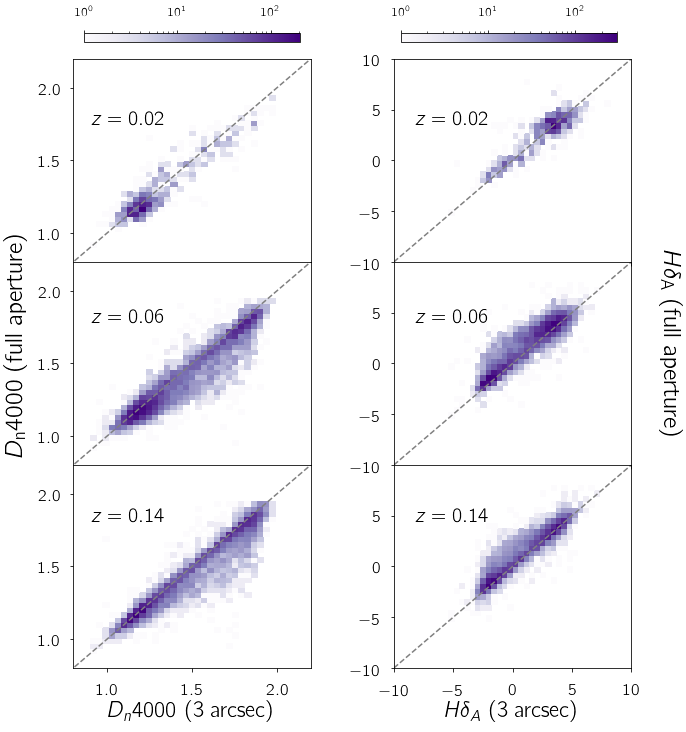

In [9]:
os.chdir("/Users/Nitya/Desktop")
fig, ax = plt.subplots(3, 2, figsize = (10,12))
t1 = binned_statistic_2d(b1[0],b1[1],b1[2],statistic = 'count',bins=(30,30))
print(np.max(t1[0]))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(t1[0], mask = t1[0] == 0)
ax[0,0].plot([0.7,2.3],[0.7,2.3], color = 'grey', linestyle = '--')
cs1 = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
#fig.colorbar(cs1, ax = ax[0])
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(0.8,2.2)
ax[0,0].xaxis.set_ticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].set_yticks([1.0,1.5,2.0])
t2 = binned_statistic_2d(b1[3],b1[4],b1[5],statistic = 'count',bins=(30,30))
yedges2 = t2[1]
xedges2 = t2[2]
number = np.ma.array(t2[0], mask = t2[0] == 0)
ax[0,1].plot([-10,10],[-10,10], color = 'grey', linestyle = '--')
cs2 = ax[0,1].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
ax[0,1].set_xlim(-10,10)
ax[0,1].set_ylim(-10,10)
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].set_yticks([-10,-5,0,5,10])

t1 = binned_statistic_2d(b2[0],b2[1],b2[2],statistic = 'count',bins=(yedges1,xedges1))
print(np.max(t1[0]))
number = np.ma.array(t1[0], mask = t1[0] == 0)
ax[1,0].plot([0.7,2.3],[0.7,2.3], color = 'grey', linestyle = '--')
cs1 = ax[1,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
print(np.max(t1[0]))
#fig.colorbar(cs1, ax = ax[0])
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(0.8,2.2)
ax[1,0].xaxis.set_ticks([1.0,1.5,2.0])
ax[1,0].xaxis.set_ticks([1.0,1.5,2.0])
ax[1,0].set_yticks([1.0,1.5,2.0])
ax[1,0].xaxis.set_ticklabels([])
t2 = binned_statistic_2d(b2[3],b2[4],b2[5],statistic = 'count',bins=(yedges2,xedges2))
number = np.ma.array(t2[0], mask = t2[0] == 0)
ax[1,1].plot([-10,10],[-10,10], color = 'grey', linestyle = '--')
cs2 = ax[1,1].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
ax[1,1].set_xlim(-10,10)
ax[1,1].set_ylim(-10,10)
ax[1,1].xaxis.set_ticklabels([])
ax[1,1].set_yticks([-10,-5,0,5])

t1 = binned_statistic_2d(b3[0],b3[1],b3[2],statistic = 'count',bins=(yedges1,xedges1))
print(np.max(t1[0]))
number = np.ma.array(t1[0], mask = t1[0] == 0)
ax[2,0].plot([0.7,2.3],[0.7,2.3], color = 'grey', linestyle = '--')
cs1 = ax[2,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
ax[2,0].set_xlim(0.8,2.2)
ax[2,0].set_ylim(0.8,2.2)
ax[2,0].set_yticks([1.0,1.5,2.0])
ax[2,0].xaxis.set_ticks([1.0,1.5,2.0])
ax[2,0].set_xlabel(r'$D_{n}4000$ (3 arcsec)')
t2 = binned_statistic_2d(b3[3],b3[4],b3[5],statistic = 'count',bins=(yedges2,xedges2))
number = np.ma.array(t2[0], mask = t2[0] == 0)
ax[2,1].plot([-10,10],[-10,10], color = 'grey', linestyle = '--')
cs2 = ax[2,1].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.Purples, norm = colors.LogNorm())
ax[2,1].set_xlim(-10,10)
ax[2,1].set_ylim(-10,10)
ax[2,1].set_yticks([-10,-5,0,5])
ax[2,1].set_xlabel(r'$H\delta_{A}$ (3 arcsec)')
#ax[2,1].yaxis.set_ticklabels([-10,-5,0,5])

fig.text(0.20, 0.76, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.20, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.20, 0.3, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.65, 0.76, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.65, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.65, 0.3, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.05, 0.5, r'$D_{\rm n}4000$ (full aperture)', 
          rotation=90, ha='center', va='center', fontsize = 25)
fig.text(0.95, 0.5, r'$H\delta_{\rm A}$ (full aperture)', 
          rotation=270, ha='center', va='center', fontsize = 25)

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.tick_params(labelsize=13)
cb1.ax.xaxis.set_ticks_position('top')

cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)
filename = "full_aperture_comparisons.pdf"


plt.gcf().subplots_adjust(wspace=0.35, hspace = 0, top = 0.83)
plt.savefig(filename)
plt.show()
    

/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the

-0.12920174812010884 0.08521198971347736
0.25429258331895976 2.7717393684489102
-0.16845786925625497 0.036362271512624424
0.006199634835864041 0.33646608281820434
-0.10716271716507182 0.10053993385536737
0.007407226999340033 0.19526149105913085


/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


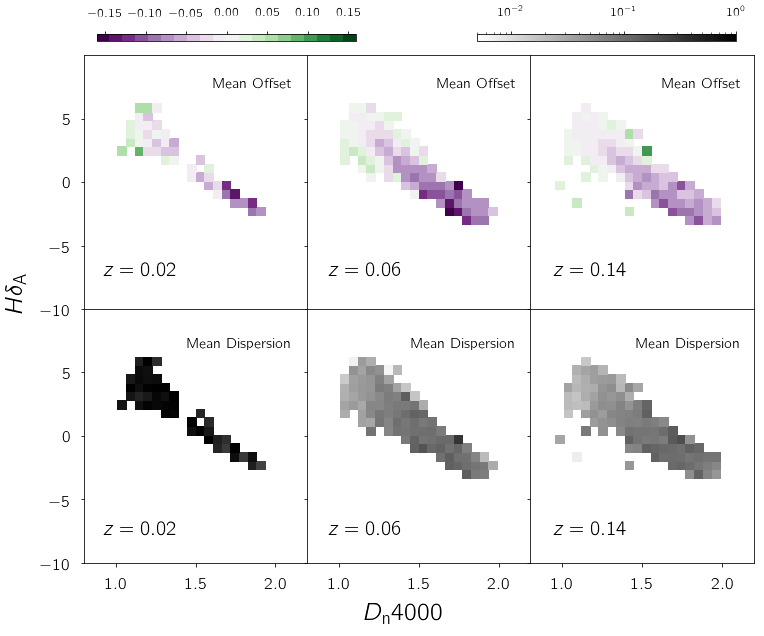

In [13]:
fig, ax = plt.subplots(2, 3, figsize = (12,10))

bounds2 = np.linspace(-0.16, 0.16, 21)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
#bounds1 = np.linspace(0.005, 1.0, 21)
norm1 = colors.LogNorm(0.005,1.0)
#norm1 = colors.BoundaryNorm(np.linspace(0.1,1.0,9))

t1 = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'mean',bins=(20,20))
tcount = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'count',bins=(20,20))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.PRGn, norm = norm2)
#fig.colorbar(cs1, ax = ax[0])
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(-10,10)
ax[0,0].set_xticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].yaxis.set_ticks([-10,-5,0,5])
t2 = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = np.std,bins=(20,20))
yedges2 = t2[1]
xedges2 = t2[2]
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,0].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(-10,10)
ax[1,0].set_xticks([1.0,1.5,2.0])
ax[1,0].yaxis.set_ticks([-10,-5,0,5])

t1 = binned_statistic_2d(c2[0],c2[1],c2[2],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c2[0],c2[1],c2[2],statistic = 'count',bins=(yedges1,xedges1))
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,1].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.PRGn, norm = norm2)
ax[0,1].set_xlim(0.8,2.2)
ax[0,1].set_ylim(-10,10)
ax[0,1].set_xticks([1.0,1.5,2.0])
ax[0,1].set_yticks([-10,-5,0,5])
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].yaxis.set_ticklabels([])
t2 = binned_statistic_2d(c2[0],c2[1],c2[2],statistic =np.std,bins=(yedges2,xedges2))
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,1].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,1].set_xlim(0.8,2.2)
ax[1,1].set_ylim(-10,10)
ax[1,1].set_xticks([1.0,1.5,2.0])
ax[1,1].yaxis.set_ticklabels([])

t1 = binned_statistic_2d(c3[0],c3[1],c3[2],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c3[0],c3[1],c3[2],statistic = 'count',bins=(yedges1,xedges1))
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,2].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.PRGn, norm =norm2)
ax[0,2].set_xlim(0.8,2.2)
ax[0,2].set_ylim(-10,10)
ax[0,2].set_yticks([-10,-5,0,5])
ax[0,2].set_xticks([1.0,1.5,2.0])
ax[0,2].yaxis.set_ticklabels([])
t2 = binned_statistic_2d(c3[0],c3[1],c3[2],statistic = np.std,bins=(yedges1,xedges1))
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,2].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,2].set_xlim(0.8,2.2)
ax[1,2].set_ylim(-10,10)
ax[1,2].yaxis.set_ticklabels([])

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cb1.set_clim(-0.16,0.16)
cb1.set_ticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15])

cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)

fig.text(0.32, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.58, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.84, 0.79, r'Mean Offset',
         ha='center', va='center', fontsize = 15)

fig.text(0.305, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.565, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.825, 0.43, r'Mean Dispersion',
         ha='center', va='center', fontsize = 15)

fig.text(0.19, 0.53, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.53, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.19, 0.17, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.17, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.17, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.495, 0.05, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.05, 0.5, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)


filename = "dn4000_full_aperture_comparisons.pdf"
plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
plt.savefig(filename)
plt.show()

/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the

-1.099669687270487 1.298251486477496
0.25429258331895976 2.7717393684489102
-1.2469511720942976 2.243382729337589
0.2190855293342584 2.3269595233120435
-0.9876958254145705 1.3979157934680089
0.08958557592352792 2.68701127054451


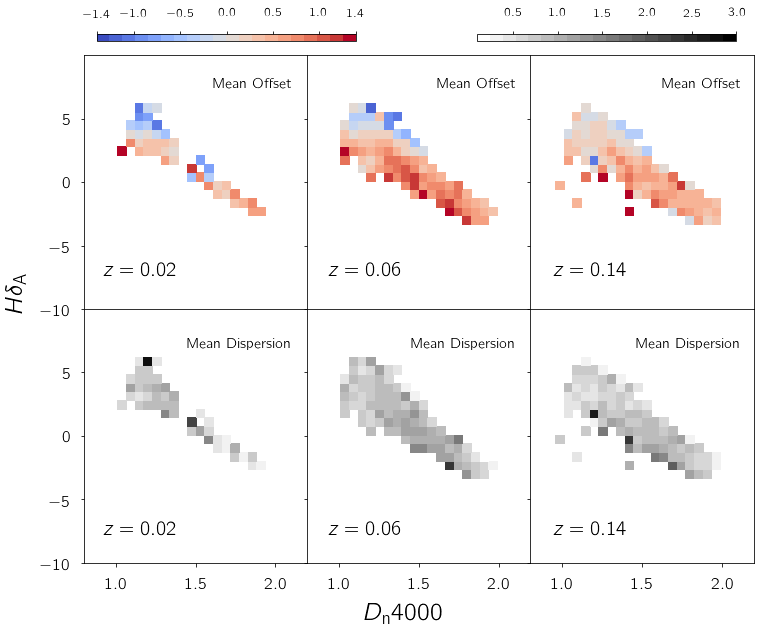

In [13]:
fig, ax = plt.subplots(2, 3, figsize = (12,10))

bounds2 = np.linspace(-1.4, 1.4, 21)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
bounds1 = np.linspace(0.1, 3, 21)
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
#norm1 = colors.LogNorm(0.1,3)

t1 = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = 'mean',bins=(20,20))
tcount = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = 'count',bins=(20,20))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.coolwarm, norm = norm2)
#fig.colorbar(cs1, ax = ax[0])
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(-10,10)
ax[0,0].set_xticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].yaxis.set_ticks([-10,-5,0,5])
t2 = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = np.std,bins=(20,20))
yedges2 = t2[1]
xedges2 = t2[2]
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,0].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(-10,10)
ax[1,0].set_xticks([1.0,1.5,2.0])
ax[1,0].yaxis.set_ticks([-10,-5,0,5])

t1 = binned_statistic_2d(c2[0],c2[1],c2[3],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c2[0],c2[1],c2[3],statistic = 'count',bins=(yedges1,xedges1))
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,1].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.coolwarm, norm = norm2)
ax[0,1].set_xlim(0.8,2.2)
ax[0,1].set_ylim(-10,10)
ax[0,1].set_xticks([1.0,1.5,2.0])
ax[0,1].set_yticks([-10,-5,0,5])
ax[0,1].xaxis.set_ticklabels([])
ax[0,1].yaxis.set_ticklabels([])
t2 = binned_statistic_2d(c2[0],c2[1],c2[3],statistic =np.std,bins=(yedges2,xedges2))
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,1].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,1].set_xlim(0.8,2.2)
ax[1,1].set_ylim(-10,10)
ax[1,1].set_xticks([1.0,1.5,2.0])
ax[1,1].yaxis.set_ticklabels([])

t1 = binned_statistic_2d(c3[0],c3[1],c3[3],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c3[0],c3[1],c3[3],statistic = 'count',bins=(yedges1,xedges1))
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,2].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.coolwarm, norm =norm2)
ax[0,2].set_xlim(0.8,2.2)
ax[0,2].set_ylim(-10,10)
ax[0,2].set_yticks([-10,-5,0,5])
ax[0,2].set_xticks([1.0,1.5,2.0])
ax[0,2].yaxis.set_ticklabels([])
t2 = binned_statistic_2d(c3[0],c3[1],c3[3],statistic = np.std,bins=(yedges1,xedges1))
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,2].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,2].set_xlim(0.8,2.2)
ax[1,2].set_ylim(-10,10)
ax[1,2].yaxis.set_ticklabels([])

cbar_ax1 = fig.add_axes([0.14, 0.85, 0.3, 0.01])
cb1 = fig.colorbar(cs1,orientation = 'horizontal', cax=cbar_ax1)
cb1.ax.xaxis.set_ticks_position('top')
cb1.ax.tick_params(labelsize=13)
cb1.set_clim(-1.4,1.4)
cb1.set_ticks([-1.4,-1,-0.5,0,0.5,1,1.4])

cbar_ax2 = fig.add_axes([0.58, 0.85, 0.3, 0.01])
cb2 = fig.colorbar(cs2,orientation = 'horizontal', cax=cbar_ax2)
cb2.ax.xaxis.set_ticks_position('top')
cb2.ax.tick_params(labelsize=13)
cb2.set_ticks([0.5,1,1.5,2.0,2.5,3.0])

fig.text(0.32, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.58, 0.79, 'Mean Offset',
         ha='center', va='center', fontsize = 15)
fig.text(0.84, 0.79, r'Mean Offset',
         ha='center', va='center', fontsize = 15)

fig.text(0.305, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.565, 0.43, 'Mean Dispersion',
         ha='center', va='center', fontsize = 15)
fig.text(0.825, 0.43, r'Mean Dispersion',
         ha='center', va='center', fontsize = 15)

fig.text(0.19, 0.53, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.53, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.53, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.19, 0.17, r'$z = 0.02$',
         ha='center', va='center', fontsize = 20)
fig.text(0.45, 0.17, r'$z = 0.06$',
         ha='center', va='center', fontsize = 20)
fig.text(0.71, 0.17, r'$z = 0.14$',
         ha='center', va='center', fontsize = 20)

fig.text(0.495, 0.05, r'$D_{\rm n}4000$', 
         ha='center', va='center', fontsize = 25)
fig.text(0.05, 0.5, r'$H\delta_{\rm A}$', 
          rotation=90, ha='center', va='center', fontsize = 25)


filename = "hdelta_full_aperture_comparisons.pdf"
plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
plt.savefig(filename)
plt.show()
    

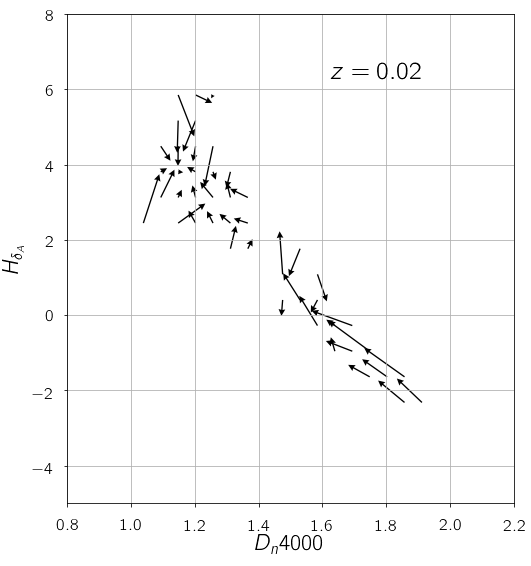

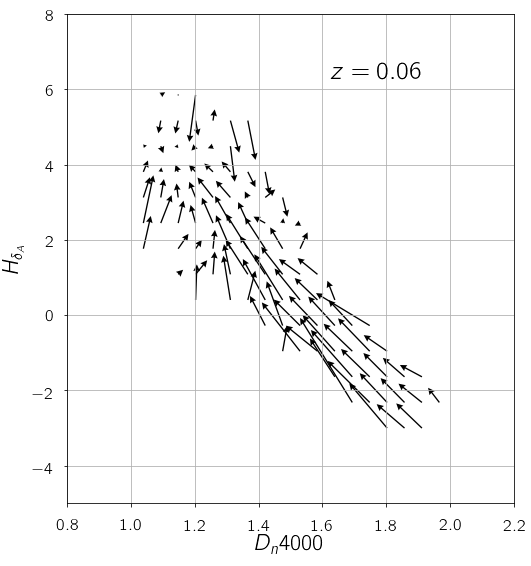

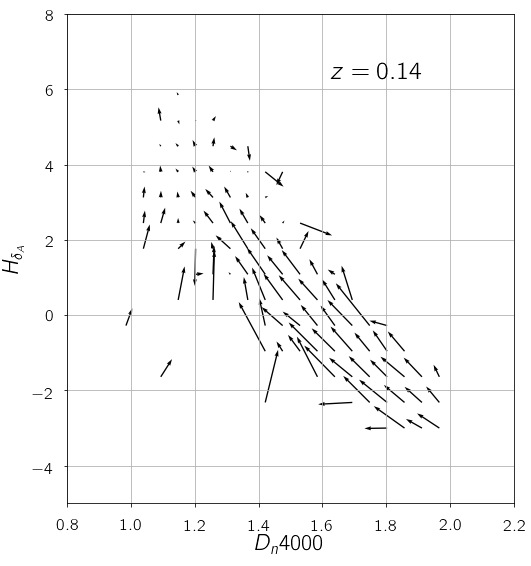

In [17]:
hdoff = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = 'mean',bins=(20,20))
xedges1 = hdoff[2]
yedges1 = hdoff[1]
d4off = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'mean',bins=(20,20))
tcount = binned_statistic_2d(c1[0],c1[1],c1[0],statistic = 'count',bins=(20,20))
yedges = [0.5*(tcount[1][i] + tcount[1][i+1]) for i in range(20)]
xedges = [0.5*(tcount[2][i] + tcount[2][i+1]) for i in range(20)]
hd_offset = np.ma.array(hdoff[0], mask = tcount[0] <= 3)
d4_offset = np.ma.array(d4off[0], mask = tcount[0] <= 3)

fig, ax = plt.subplots(figsize = (8,9))
q = ax.quiver(yedges, xedges, np.transpose(d4_offset), 
              np.transpose(hd_offset), headwidth=5,angles = 'xy', scale = 1., scale_units = 'xy')
ax.grid()
ax.set_xlim(0.8,2.2)
ax.set_ylim(-5,8.0)
ax.set_xlabel(r'$D_{n}4000$')
ax.set_ylabel(r'$H_{\delta_{A}}$')
filename = "quiver_a.pdf"
#plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
fig.text(0.66, 0.79, r'$z = 0.02$',
         ha='center', va='center', fontsize = 25)
plt.savefig(filename)
plt.show()

hdoff = binned_statistic_2d(c2[0],c2[1],c2[3],statistic = 'mean',bins=(yedges1,xedges1))
d4off = binned_statistic_2d(c2[0],c2[1],c2[2],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c2[0],c2[1],c2[0],statistic = 'count',bins=(yedges1,xedges1))
yedges = [0.5*(tcount[1][i] + tcount[1][i+1]) for i in range(20)]
xedges = [0.5*(tcount[2][i] + tcount[2][i+1]) for i in range(20)]
hd_offset = np.ma.array(hdoff[0], mask = tcount[0] <= 3)
d4_offset = np.ma.array(d4off[0], mask = tcount[0] <= 3)
fig, ax = plt.subplots(figsize = (8,9))
q = ax.quiver(yedges, xedges, np.transpose(d4_offset), 
              np.transpose(hd_offset), headwidth=5, angles = 'xy', scale = 1., scale_units = 'xy')
ax.grid()
ax.set_xlim(0.8,2.2)
ax.set_ylim(-5,8.0)
ax.set_xlabel(r'$D_{n}4000$')
ax.set_ylabel(r'$H_{\delta_{A}}$')
filename = "quiver_b.pdf"
#plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
fig.text(0.66, 0.79, r'$z = 0.06$',
         ha='center', va='center', fontsize = 25)
plt.savefig(filename)
plt.show()

hdoff = binned_statistic_2d(c3[0],c3[1],c3[3],statistic = 'mean',bins=(yedges1,xedges1))
d4off = binned_statistic_2d(c3[0],c3[1],c3[2],statistic = 'mean',bins=(yedges1,xedges1))
tcount = binned_statistic_2d(c3[0],c3[1],c3[0],statistic = 'count',bins=(yedges1,xedges1))
yedges = [0.5*(tcount[1][i] + tcount[1][i+1]) for i in range(20)]
xedges = [0.5*(tcount[2][i] + tcount[2][i+1]) for i in range(20)]
hd_offset = np.ma.array(hdoff[0], mask = tcount[0] <= 3)
d4_offset = np.ma.array(d4off[0], mask = tcount[0] <= 3)

fig, ax = plt.subplots(figsize = (8,9))
q = ax.quiver(yedges, xedges, np.transpose(d4_offset), np.transpose(hd_offset), 
              angles = 'xy', scale = 1., scale_units = 'xy')
ax.grid()
ax.set_xlim(0.8,2.2)
ax.set_ylim(-5.0,8.0)
ax.set_xlabel(r'$D_{n}4000$',)
ax.set_ylabel(r'$H_{\delta_{A}}$')

filename = "quiver_c.pdf"
#plt.gcf().subplots_adjust(wspace=0, hspace = 0, top = 0.83)
fig.text(0.66, 0.79, r'$z = 0.14$',
         ha='center', va='center', fontsize = 25)
plt.savefig(filename)
plt.show()





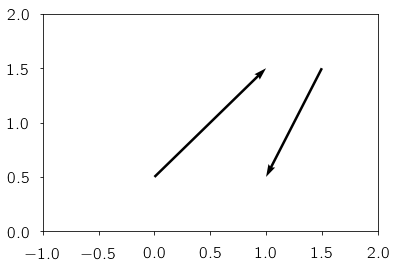

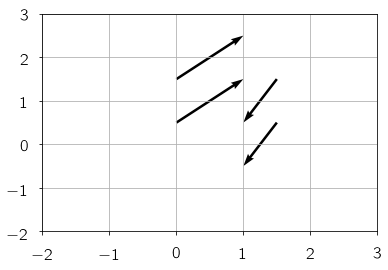

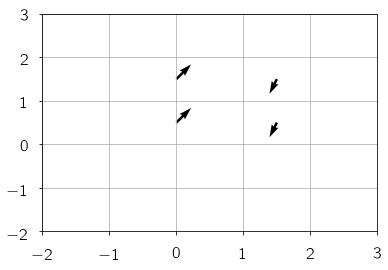

In [18]:
#Quiver-practice

fig, ax=plt.subplots()

ax.quiver([0,1.5],[.5,1.5],[1,-0.5],[1,-1],
          angles='xy', scale_units='xy', scale=1.)

ax.set_xlim([-1,2])
ax.set_ylim([0,2])
plt.show()

fig, ax=plt.subplots()

ax.quiver([0,1.5],[.5,1.5],[[1,-0.5],[1,-0.5]],[[1,-1],[1,-1]],
          angles='xy', scale_units='xy', scale=1.)
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.grid()
plt.show()

fig, ax=plt.subplots()

ax.quiver([0,1.5],[.5,1.5],[[1,-0.5],[1,-0.5]],[[1,-1],[1,-1]])
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.grid()
plt.show()


In [19]:
yedges, xedges, np.transpose(d4_offset), np.transpose(hd_offset)

([0.9292642495984639,
  0.9838693553051644,
  1.038474461011865,
  1.0930795667185653,
  1.147684672425266,
  1.2022897781319666,
  1.256894883838667,
  1.3114999895453678,
  1.3661050952520681,
  1.4207102009587689,
  1.4753153066654692,
  1.52992041237217,
  1.5845255180788702,
  1.639130623785571,
  1.6937357294922715,
  1.748340835198972,
  1.8029459409056725,
  1.857551046612373,
  1.9121561523190738,
  1.966761258025774],
 [-5.043608287077435,
  -4.362737209784305,
  -3.6818661324911743,
  -3.0009950551980435,
  -2.3201239779049128,
  -1.6392529006117824,
  -0.9583818233186521,
  -0.2775107460255213,
  0.4033603312676095,
  1.0842314085607403,
  1.7651024858538706,
  2.4459735631470005,
  3.1268446404401313,
  3.807715717733262,
  4.488586795026393,
  5.169457872319524,
  5.850328949612654,
  6.531200026905784,
  7.212071104198915,
  7.892942181492046],
 masked_array(
   data=[[--, --, --, --, --, --, --, --, --, --, --, --, --, --, --, --,
          --, --, --, --],
         [--

-0.12920174812010884 0.08521198971347736
0.25429258331895976 2.7717393684489102


/Users/nitya/miniconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/nitya/miniconda3/lib/python3.6/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


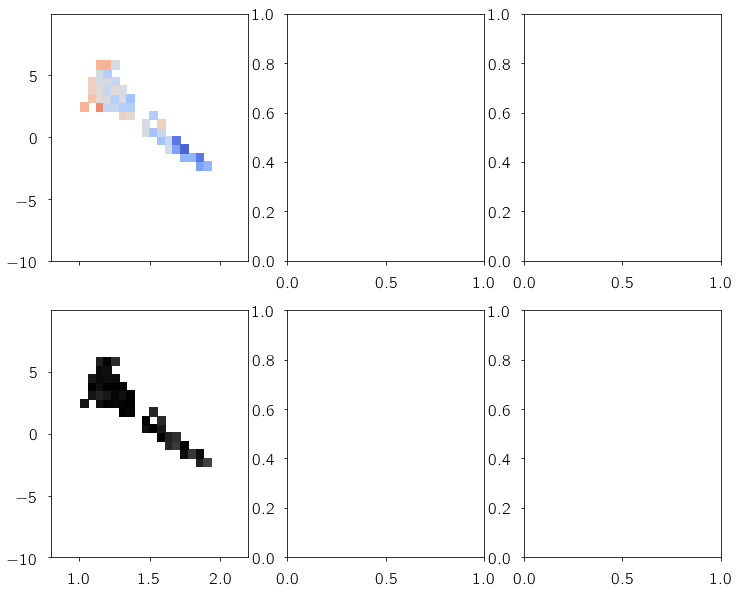

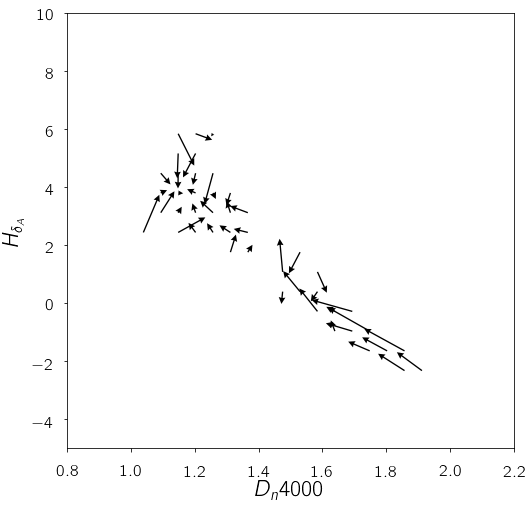

In [20]:
fig, ax = plt.subplots(2, 3, figsize = (12,10))

bounds2 = np.linspace(-0.16, 0.16, 21)
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)
#bounds1 = np.linspace(0.005, 1.0, 21)
norm1 = colors.LogNorm(0.005,1.0)
#norm1 = colors.BoundaryNorm(np.linspace(0.1,1.0,9))

t1 = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'mean',bins=(20,20))
tcount = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'count',bins=(20,20))
yedges1 = t1[1]
xedges1 = t1[2]
number = np.ma.array(t1[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs1 = ax[0,0].pcolormesh(yedges1,xedges1,(np.transpose(number)),cmap = plt.cm.coolwarm, norm = norm2)
#fig.colorbar(cs1, ax = ax[0])
ax[0,0].set_xlim(0.8,2.2)
ax[0,0].set_ylim(-10,10)
ax[0,0].set_xticks([1.0,1.5,2.0])
ax[0,0].xaxis.set_ticklabels([])
ax[0,0].yaxis.set_ticks([-10,-5,0,5])
t2 = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = np.std,bins=(20,20))
yedges2 = t2[1]
xedges2 = t2[2]
number = np.ma.array(t2[0], mask = tcount[0] <= 3)
print(np.min(number), np.max(number))
cs2 = ax[1,0].pcolormesh(yedges2,xedges2,(np.transpose(number)),cmap = plt.cm.binary, norm = norm1)
ax[1,0].set_xlim(0.8,2.2)
ax[1,0].set_ylim(-10,10)
ax[1,0].set_xticks([1.0,1.5,2.0])
ax[1,0].yaxis.set_ticks([-10,-5,0,5])


hdoff = binned_statistic_2d(c1[0],c1[1],c1[3],statistic = 'mean',bins=(20,20))
xedges1 = hdoff[2]
yedges1 = hdoff[1]
d4off = binned_statistic_2d(c1[0],c1[1],c1[2],statistic = 'mean',bins=(20,20))
tcount = binned_statistic_2d(c1[0],c1[1],c1[0],statistic = 'count',bins=(20,20))
yedges = [0.5*(tcount[1][i] + tcount[1][i+1]) for i in range(20)]
xedges = [0.5*(tcount[2][i] + tcount[2][i+1]) for i in range(20)]
hd_offset = np.ma.array(hdoff[0], mask = tcount[0] <= 3)
d4_offset = np.ma.array(d4off[0], mask = tcount[0] <= 3)

fig, ax = plt.subplots(figsize = (8,8))
q = ax.quiver(yedges, xedges, np.transpose(d4_offset), 
              np.transpose(hd_offset), headwidth=5,angles = 'xy', scale = 1., scale_units = 'xy')
plt.xlim(0.8,2.2)
plt.ylim(-5,10)
plt.xlabel(r'$D_{n}4000$')
plt.ylabel(r'$H_{\delta_{A}}$')
#filename4 = "z_"+str(z)+"_d.pdf"
#plt.savefig(filename4)
plt.show()